✅ Dataset loaded successfully after skipping problematic rows!
Shape: (11119, 26)

🎯 Model Performance:
R² Score: 0.823
RMSE: $6,060


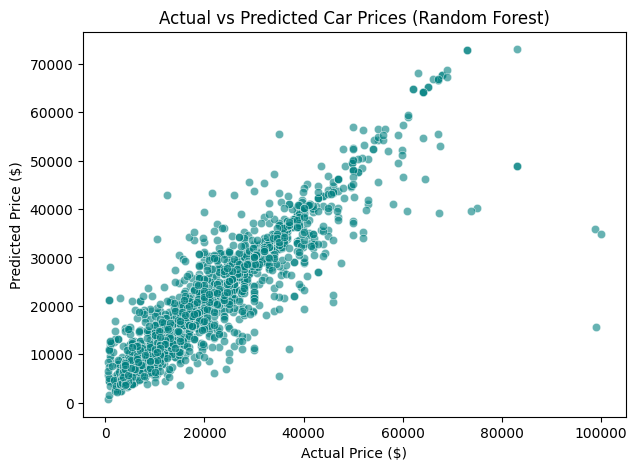

/tmp/ipython-input-327199226.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


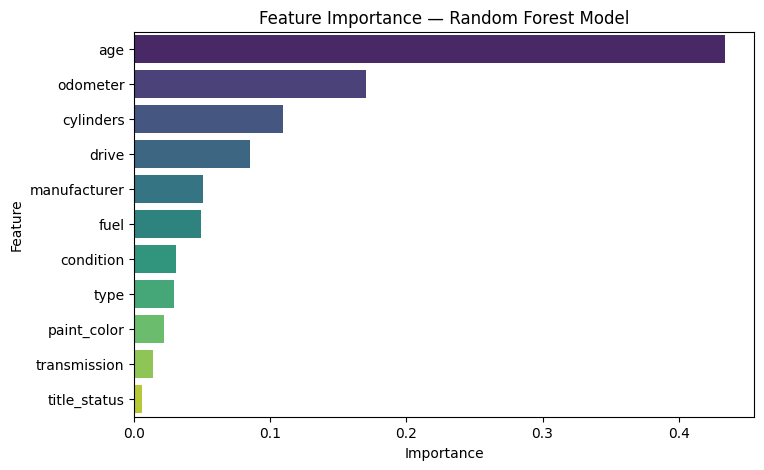

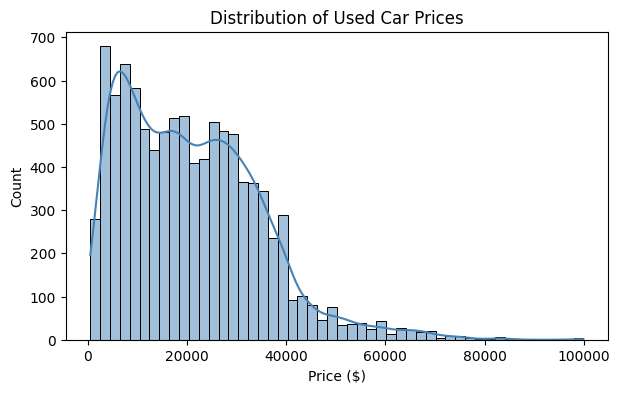

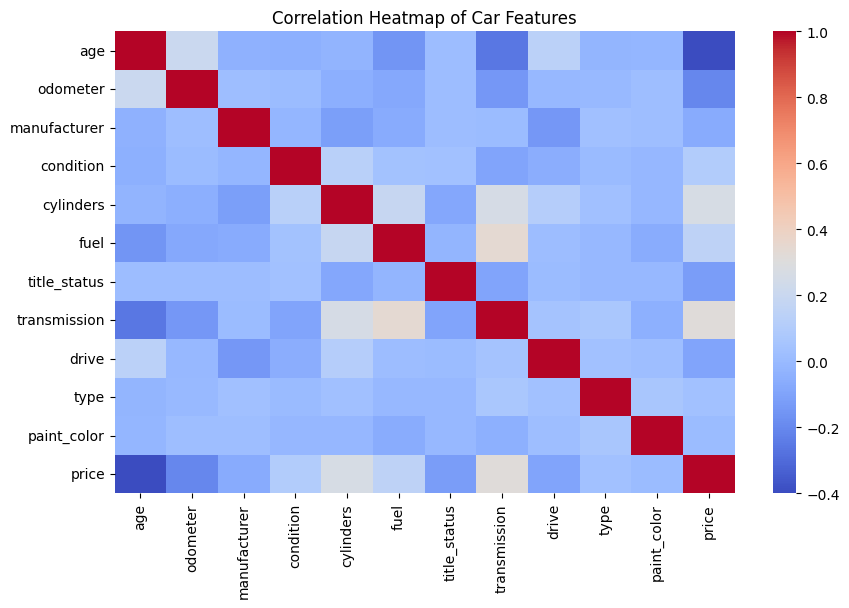


✅ Exported Files for Dashboarding:
- cleaned_used_cars.csv
- car_price_predictions.csv
- feature_importance.csv

📊 Summary:
The Random Forest model achieved an R² of 0.82 and RMSE of $6,060.
Top features influencing price:
        Feature  Importance
0           age    0.433758
1      odometer    0.170282
4     cylinders    0.109081
8         drive    0.085271
2  manufacturer    0.050336


In [4]:
# === Used Car Price Prediction (Craigslist Dataset) ===
# Cleaned & Updated Version
# Author: Pranathi
# Description: Predict used car prices using Random Forest Regression.

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Load Dataset (Robust CSV Parser)
df = pd.read_csv("vehicles.csv", engine="python", on_bad_lines="skip")
print("✅ Dataset loaded successfully after skipping problematic rows!")
print("Shape:", df.shape)

# Step 3: Basic Cleaning
df = df.drop_duplicates()
df = df.dropna(subset=['price', 'year', 'odometer', 'manufacturer'])

# Convert year safely to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

# Filter out extreme or unrealistic prices
df = df[(df['price'] > 500) & (df['price'] < 100000)]

# Step 4: Feature Engineering
df['age'] = 2024 - df['year'].astype(int)

# Select relevant columns
features = [
    'age', 'odometer', 'manufacturer', 'condition', 'cylinders', 'fuel',
    'title_status', 'transmission', 'drive', 'type', 'paint_color'
]

df = df[features + ['price']].copy()

# Handle missing values
df = df.fillna('missing')

# Step 5: Encode Categorical Features
cat_cols = [
    'manufacturer', 'condition', 'cylinders', 'fuel',
    'title_status', 'transmission', 'drive', 'type', 'paint_color'
]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 6: Define Features and Target
X = df.drop('price', axis=1)
y = df['price']

# Scale numeric features
sc = StandardScaler()
X[['age', 'odometer']] = sc.fit_transform(X[['age', 'odometer']])

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model Training
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 9: Model Evaluation
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n🎯 Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.0f}")

# Step 10: Visualizations
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()

# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance — Random Forest Model")
plt.show()

# Price Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['price'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price ($)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Car Features")
plt.show()

# Step 11: Export for Dashboarding
pred_df = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})
pred_df.to_csv('car_price_predictions.csv', index=False)
importance.to_csv('feature_importance.csv', index=False)
df.to_csv('cleaned_used_cars.csv', index=False)

print("\n✅ Exported Files for Dashboarding:")
print("- cleaned_used_cars.csv")
print("- car_price_predictions.csv")
print("- feature_importance.csv")

# Step 12: Summary
print("\n📊 Summary:")
print(f"The Random Forest model achieved an R² of {r2:.2f} and RMSE of ${rmse:,.0f}.")
print("Top features influencing price:")
print(importance.head(5))
